In [377]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from pandas.tools.plotting import parallel_coordinates
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [378]:
dfhabitable=pd.read_csv('habitable_planets_detailed_list.csv')
dfhabitable=dfhabitable[dfhabitable['koi_disposition']!='FALSE POSITIVE']
dfhabitable=dfhabitable[['rowid','kepid','kepoi_name','koi_disposition','koi_period','koi_ror','koi_srho','koi_prad','koi_sma','koi_teq','koi_insol','koi_dor','koi_count','koi_steff','koi_slogg','koi_smet','koi_srad','koi_smass']]

In [379]:
dfnonH=pd.read_csv('non_habitable_planets_confirmed_detailed_list.csv')
dfnonH=dfnonH[['rowid','kepid','kepoi_name','koi_disposition','koi_period','koi_ror','koi_srho','koi_prad','koi_sma','koi_teq','koi_insol','koi_dor','koi_count','koi_steff','koi_slogg','koi_smet','koi_srad','koi_smass']]
dfnonH=dfnonH[dfnonH['koi_disposition']!='FALSE POSITIVE']

In [380]:
# fig, axes = plt.subplots()
df=dfhabitable.drop(columns=['rowid','koi_disposition','kepid','kepoi_name'])
data_norm = (df - df.min())/(df.max() - df.min())
pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(data_norm))
transformed["Habitable"]=True

In [381]:
dfnonTail=dfnonH.drop(columns=['rowid','koi_disposition','kepid','kepoi_name']).tail(1000)
dfnonHead=dfnonH.drop(columns=['rowid','koi_disposition','kepid','kepoi_name']).head(1219)
dffinalnonH=pd.concat([dfnonTail, dfnonHead])
non_norm= (dffinalnonH - dffinalnonH.min())/(dffinalnonH.max() - dffinalnonH.min())
pca = sklearnPCA(n_components=2)
nontransformed = pd.DataFrame(pca.fit_transform(non_norm))
nontransformed["Habitable"]=False

In [382]:
df["Habitable"]=True
dffinalnonH["Habitable"]=False

In [383]:
dffinal=pd.concat([transformed, nontransformed])

In [384]:
x_trainingH=df.head(75)
x_testH=df.tail(49)
x_trainingnonH=dffinalnonH.head(1406)
x_testnonH=dffinalnonH.tail(813)
x_training=pd.concat([x_trainingH,x_trainingnonH],sort=False)
x_test=pd.concat([x_testH,x_testnonH])
y_train=x_training['Habitable']
y_test=x_test['Habitable']
x_training=x_training[['koi_period','koi_ror','koi_srho','koi_prad','koi_sma','koi_teq','koi_insol','koi_dor','koi_count','koi_steff','koi_slogg','koi_smet','koi_srad','koi_smass']]
x_test=x_test[['koi_period','koi_ror','koi_srho','koi_prad','koi_sma','koi_teq','koi_insol','koi_dor','koi_count','koi_steff','koi_slogg','koi_smet','koi_srad','koi_smass']]


In [385]:
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(x_training, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [386]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9895591647331786


[[811   2]
 [  7  42]]


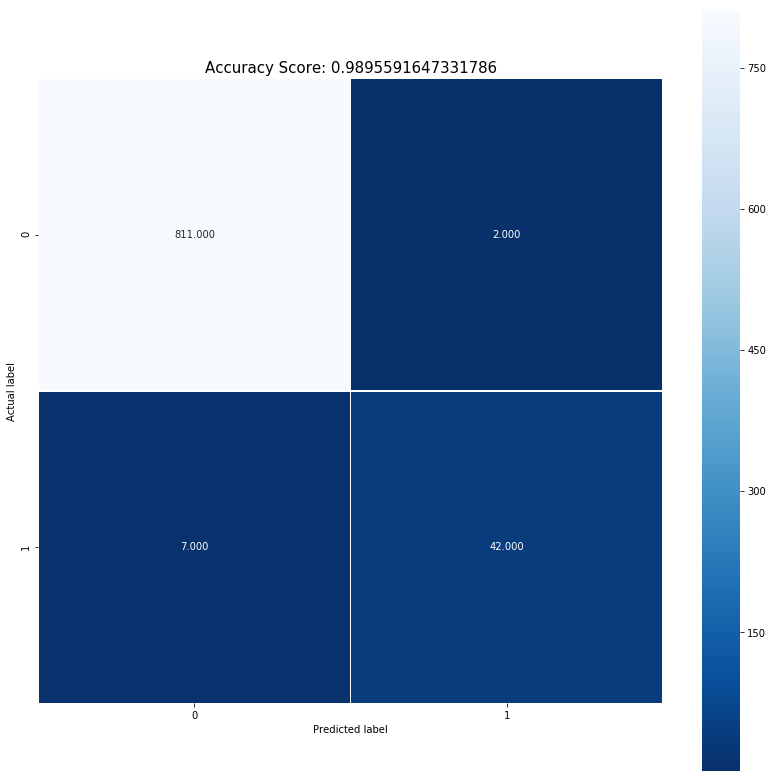

In [387]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
plt.figure(figsize=(14,14))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [416]:
newsample=pd.read_csv('planets-2.csv')
newsample=newsample.dropna()
newsample=newsample.reset_index()
newsample

index  loc_rowid     pl_hostname           pl_name  pl_pnum    pl_orbper  \
0      4        102  EPIC 246851721  EPIC 246851721 b        1     6.180235   
1      7        255         HATS-36         HATS-36 b        1     4.175239   
2    187       1016          K2-266          K2-266 b        4     0.658524   
3    188       1017          K2-266          K2-266 c        4     7.814000   
4    189       1018          K2-266          K2-266 d        4    14.697000   
5    190       1019          K2-266          K2-266 e        4    19.482000   
6    192       1124         KELT-21         KELT-21 b        1     3.612765   
7    194       2025     Kepler-1654     Kepler-1654 b        1  1047.835600   

   pl_orbsmax  st_teff  st_mass  st_rad  pl_eqt  pl_insol  pl_rade  pl_ratdor  \
0     0.07229   6202.0     1.32    1.59  1401.0    642.00   11.781       9.80   
1     0.05425   6149.0     1.22    1.16  1356.0    561.00   13.843      10.10   
2     0.01306   4285.0     0.69    0.70  1515.0    879.50    3.300       4.00   
3     0.06790   4285.0     0.69    0.70   665.0     32.40    0.705      20.80   
4     0.10350   4285.0     0.69    0.70   538.0     13.95    2.930      31.70   
5     0.12490   4285.0     0.69    0.70   490.0      9.58    2.730      38.20   
6     0.05224   7598.0     1.46    1.64  2051.0   2950.00   17.777       6.86   
7     2.02600   5597.0     1.01    1.18   206.0      0.30    9.180     370.30   

   pl_ratror  st_logg  st_dens  st_metfe  
0    0.06810     4.16    0.465     0.141  
1    0.10966     4.40    1.118     0.280  
2    0.04300     4.58    2.790    -0.120  
3    0.00920     4.58    2.790    -0.120  
4    0.03827     4.58    2.790    -0.120  
5    0.03564     4.58    2.790    -0.120  
6    0.09952     4.17    0.468    -0.405  
7    0.07138     4.30    0.876    -0.088

In [417]:
sampledata=newsample[['pl_orbper','pl_ratror','st_dens','pl_rade','pl_orbsmax','pl_eqt','pl_insol','pl_ratdor','pl_pnum','st_teff','st_logg','st_metfe','st_rad','st_mass']].dropna()
normsampledata= (sampledata - sampledata.min())/(sampledata.max() - sampledata.min())
results=logisticRegr.predict_proba(normsampledata)
results=pd.DataFrame(results)
newsample["Probability of Not Habitable"]=results[0]
newsample['Probability of Habitable']=results[1]
predictresult=logisticRegr.predict(normsampledata)
newsample["Results"]=predictresult
newsample

index  loc_rowid     pl_hostname           pl_name  pl_pnum    pl_orbper  \
0      4        102  EPIC 246851721  EPIC 246851721 b        1     6.180235   
1      7        255         HATS-36         HATS-36 b        1     4.175239   
2    187       1016          K2-266          K2-266 b        4     0.658524   
3    188       1017          K2-266          K2-266 c        4     7.814000   
4    189       1018          K2-266          K2-266 d        4    14.697000   
5    190       1019          K2-266          K2-266 e        4    19.482000   
6    192       1124         KELT-21         KELT-21 b        1     3.612765   
7    194       2025     Kepler-1654     Kepler-1654 b        1  1047.835600   

   pl_orbsmax  st_teff  st_mass  st_rad   ...     pl_insol  pl_rade  \
0     0.07229   6202.0     1.32    1.59   ...       642.00   11.781   
1     0.05425   6149.0     1.22    1.16   ...       561.00   13.843   
2     0.01306   4285.0     0.69    0.70   ...       879.50    3.300   
3     0.06790   4285.0     0.69    0.70   ...        32.40    0.705   
4     0.10350   4285.0     0.69    0.70   ...        13.95    2.930   
5     0.12490   4285.0     0.69    0.70   ...         9.58    2.730   
6     0.05224   7598.0     1.46    1.64   ...      2950.00   17.777   
7     2.02600   5597.0     1.01    1.18   ...         0.30    9.180   

   pl_ratdor  pl_ratror  st_logg  st_dens  st_metfe  \
0       9.80    0.06810     4.16    0.465     0.141   
1      10.10    0.10966     4.40    1.118     0.280   
2       4.00    0.04300     4.58    2.790    -0.120   
3      20.80    0.00920     4.58    2.790    -0.120   
4      31.70    0.03827     4.58    2.790    -0.120   
5      38.20    0.03564     4.58    2.790    -0.120   
6       6.86    0.09952     4.17    0.468    -0.405   
7     370.30    0.07138     4.30    0.876    -0.088   

   Probability of Not Habitable  Probability of Habitable  Results  
0                      0.777260                  0.222740    False  
1                      0.712215                  0.287785    False  
2                      0.468475                  0.531525     True  
3                      0.315454                  0.684546     True  
4                      0.360718                  0.639282     True  
5                      0.355712                  0.644288     True  
6                      0.946419                  0.053581    False  
7                      0.598720                  0.401280    False  

[8 rows x 21 columns]

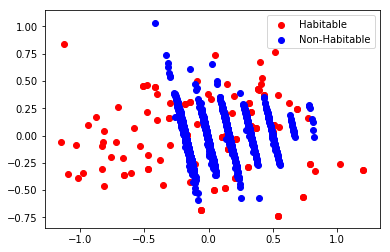

In [354]:
plt.scatter(transformed[0], transformed[1], label='Habitable', c='red')
plt.scatter(nontransformed[0], nontransformed[1], label='Non-Habitable', c='blue')
#plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')

plt.legend()
plt.show()